<a href="https://colab.research.google.com/github/JSini/pen_pencil_image_classification/blob/main/albumentation/pen_pencil_classification_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Image Classification

- Challenge: to build a decent Image Classification model for very small dataset

### Dataset

- Data: pen and pencil dataset
- Oiginal set: 10 images of pen and 10 images of pencil


In [ ]:
#!rm -rf '/content/pen_pencil_dataset-main'

In [1]:
## download data
! wget --no-check-certificate \
"https://github.com/JSini/pen_pencil_dataset/archive/refs/heads/main.zip" \
-O "pen_pencil_dataset.zip"

--2023-07-17 11:54:48--  https://github.com/JSini/pen_pencil_dataset/archive/refs/heads/main.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://codeload.github.com/JSini/pen_pencil_dataset/zip/refs/heads/main [following]
--2023-07-17 11:54:48--  https://codeload.github.com/JSini/pen_pencil_dataset/zip/refs/heads/main
Resolving codeload.github.com (codeload.github.com)... 140.82.114.10
Connecting to codeload.github.com (codeload.github.com)|140.82.114.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [application/zip]
Saving to: ‘pen_pencil_dataset.zip’

pen_pencil_dataset.     [     <=>            ]  22.59M  23.9MB/s    in 0.9s    

2023-07-17 11:54:50 (23.9 MB/s) - ‘pen_pencil_dataset.zip’ saved [23683700]



In [2]:
import zipfile

In [3]:
zipfile.is_zipfile('/content/pen_pencil_dataset.zip')

True

In [4]:
local = '/content/pen_pencil_dataset.zip'
zip_ref = zipfile.ZipFile(local, 'r')
zip_ref.extractall()
zip_ref.close()

Visualize and inspect data

In [5]:
## importing libraries
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf

In [6]:
# lets define the directory names

base_dir = '/content/pen_pencil_dataset-main/data'
train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

In [7]:
# inspect subdirs and files in our data folder
for dirpath, dirs, files in os.walk(base_dir):
    print(f"There are {len(dirs)} directories, {len(files)} files in {dirpath}")

There are 2 directories, 0 files in /content/pen_pencil_dataset-main/data
There are 2 directories, 0 files in /content/pen_pencil_dataset-main/data/train
There are 0 directories, 10 files in /content/pen_pencil_dataset-main/data/train/pen
There are 0 directories, 10 files in /content/pen_pencil_dataset-main/data/train/pencil
There are 2 directories, 0 files in /content/pen_pencil_dataset-main/data/test
There are 0 directories, 3 files in /content/pen_pencil_dataset-main/data/test/pen
There are 0 directories, 3 files in /content/pen_pencil_dataset-main/data/test/pencil


In [8]:
!ls '/content/pen_pencil_dataset-main/data/train'

pen  pencil


In [9]:
!ls '/content/pen_pencil_dataset-main/data/test'

pen  pencil


we observe the sub-dirs 'pen' and 'pencil' under the train and test directories. Guess what, that's our classes for this image classification task. Organizing the data in this structure would help harness tensoflow image_dataset_from directory functions very efficiently

In [10]:
# get our class names programatically
import pathlib

data_dir = pathlib.Path(train_dir)


In [11]:
data_dir.glob('*') ## generator object,

<generator object Path.glob at 0x7f02aa9529d0>

In [12]:
##iterate over the genertor
for item in data_dir.glob('*'):
  print(item)
  print(item.name) # grabbing the name

/content/pen_pencil_dataset-main/data/train/pen
pen
/content/pen_pencil_dataset-main/data/train/pencil
pencil


In [13]:
# get our class names programatically, store it in variable
class_names = sorted([item.name for item in data_dir.glob('*')])

In [14]:
class_names

['pen', 'pencil']

Visualizing data

Let's view some random images. Remember we need to read the images into an array and then we can use `plt.imshow` to display it.

In [15]:
import random

In [16]:
# lets define a function which takes a target directory and target class, and plots a random image

def plot_random_images(target_dir, target_class):
    path = os.path.join(target_dir, target_class)

    # get a random file
    img_file = random.sample(os.listdir(path), 1)[0]
    # print(img_file)
    # print(os.path.join(path, img_file))

    # read the image into an array
    img_array = mpimg.imread(os.path.join(path, img_file))

    # display the image
    plt.imshow(img_array)
    plt.axis(False)

    return img_array ## return the image object to study the size


(1600, 1200, 3)


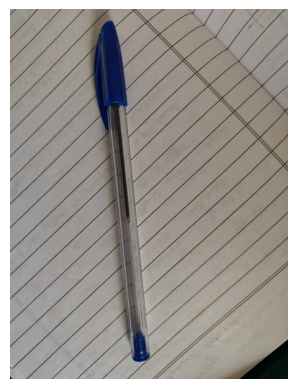

In [17]:
## train data - pen
target_dir = train_dir
target_class = 'pen'
img = plot_random_images(target_dir, target_class)
img_size = img.shape
print(img_size)

(1200, 1600, 3)


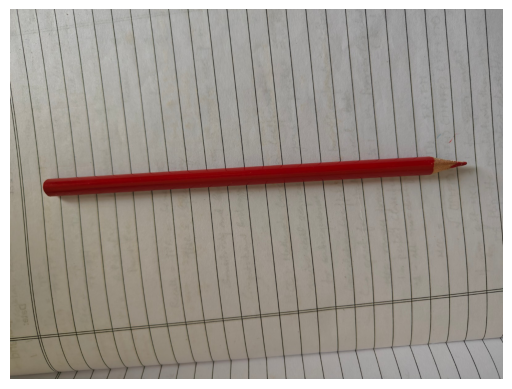

In [18]:
## train data - pencil
target_dir = train_dir
target_class = 'pencil'
img = plot_random_images(target_dir, target_class)
img_size = img.shape
print(img_size)

In [19]:
img

array([[[170, 169, 164],
        [174, 173, 168],
        [176, 175, 170],
        ...,
        [146, 146, 146],
        [145, 145, 145],
        [145, 145, 145]],

       [[174, 173, 168],
        [175, 174, 169],
        [176, 175, 170],
        ...,
        [145, 145, 145],
        [145, 145, 145],
        [144, 144, 144]],

       [[173, 172, 167],
        [173, 172, 167],
        [173, 172, 167],
        ...,
        [145, 145, 145],
        [144, 144, 144],
        [144, 144, 144]],

       ...,

       [[ 95,  86,  77],
        [ 95,  86,  77],
        [ 94,  85,  76],
        ...,
        [152, 152, 152],
        [153, 153, 153],
        [153, 153, 153]],

       [[ 96,  87,  78],
        [ 95,  86,  77],
        [ 95,  86,  77],
        ...,
        [153, 153, 153],
        [152, 152, 152],
        [152, 152, 152]],

       [[ 98,  89,  80],
        [ 98,  89,  80],
        [ 98,  89,  80],
        ...,
        [153, 153, 153],
        [152, 152, 152],
        [151, 151, 151]]

In [20]:
# the size of the image is too big and also we see differnt size(basically flipped) based on the orientation
img_size

(1200, 1600, 3)

So with the visualization, we made some observations:

- the images have three channels `(1600, 1200, 3)`
- image size is too big
- different size observed(basically flipped) due to image orientation

Note, to feed the images to the model, we need have all the images in same size. Another important note is we will normalize the image array as well. The pixel vlues lie between 0 and 255, so `image_array/255` will make it in range `[0,1]`. will do the normalizationThis will be taken care by tensorflow code

Preparing data

We will use ImageDataGenerator for this task,  data generators will read images in the source folders, convert them to `float32` tensors

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [22]:
# set the seed
tf.random.set_seed(42)

# create instance of the ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.) # we can do the rescale at this level
test_datagen = ImageDataGenerator(rescale=1/255.)

# import data from directories and batch it up
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   class_mode='binary',
                                                   batch_size=1,
                                                   target_size=(224,224))

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  class_mode='binary',
                                                  batch_size=1,
                                                  target_size=(224,224))


Found 20 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [23]:
train_generator

In [24]:
len(train_generator)

20

In [25]:
# view example case from geneartor use next(), if you loop over generator, it will be unending loop
image, label = train_generator.next()
print(image.shape)
print(label.shape)

(1, 224, 224, 3)
(1,)


For model, we will use scaled-down version of VGG-16

In [26]:
## creat a CNN model ( scaled down version of VGG-16 )
# model architecture - https://poloclub.github.io/cnn-explainer/

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

In [28]:
# compile model
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [29]:
# fit the model
history = model.fit(train_generator,
                    epochs=10,
                    validation_data=test_generator)

Epoch 1/10
20/20 [==============================] - 9s 324ms/step - loss: 0.7860 - accuracy: 0.4000 - val_loss: 0.7017 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 5s 234ms/step - loss: 0.6818 - accuracy: 0.7000 - val_loss: 0.6935 - val_accuracy: 0.6667
Epoch 3/10
20/20 [==============================] - 5s 243ms/step - loss: 0.6396 - accuracy: 0.9000 - val_loss: 0.7783 - val_accuracy: 0.5000
Epoch 4/10
20/20 [==============================] - 3s 174ms/step - loss: 0.7034 - accuracy: 0.5500 - val_loss: 0.6960 - val_accuracy: 0.5000
Epoch 5/10
20/20 [==============================] - 5s 247ms/step - loss: 0.6126 - accuracy: 0.7000 - val_loss: 0.8215 - val_accuracy: 0.5000
Epoch 6/10
20/20 [==============================] - 5s 235ms/step - loss: 0.4635 - accuracy: 0.8500 - val_loss: 0.6998 - val_accuracy: 0.6667
Epoch 7/10
20/20 [==============================] - 4s 181ms/step - loss: 0.1280 - accuracy: 1.0000 - val_loss: 1.2707 - val_accuracy: 0.1667
Epoch 

In [30]:
results = model.evaluate(test_generator)
results

6/6 [==============================] - 1s 235ms/step - loss: 2.2478 - accuracy: 0.3333


[2.2477855682373047, 0.3333333432674408]

In [31]:
#Plot learning curves

def plot_learning_curves(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    nepochs = range(len(loss))
    plt.figure(figsize=(10, 3))
    plt.subplot(1, 2, 1)
    plt.plot(nepochs, loss, label='train_loss')
    plt.plot(nepochs, val_loss, label='val_loss')
    plt.legend()
    plt.grid()
    plt.subplot(1, 2, 2)
    plt.plot(nepochs, acc, label='acc')
    plt.plot(nepochs, val_acc, label='val_acc')
    plt.legend()
    plt.grid()
    plt.show()

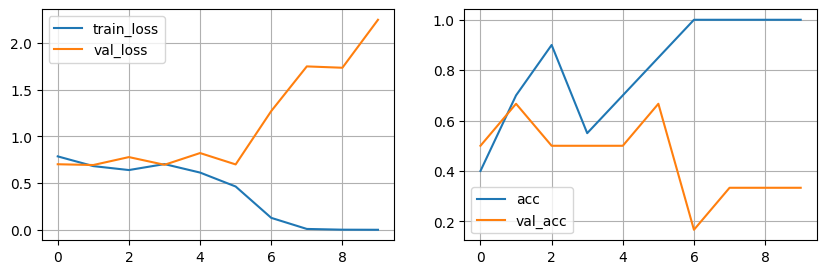

In [32]:
plot_learning_curves(history)

While train loss is trending down and accuacy trending up, the validation loss and accuracy curve don't really show any learning. What could be the reason?
- less data
- may be we can try a more simple  model


In [33]:
## creating a simpler CNN model, removing additional Conv2D layers
## lets traing for 20 epochs

model1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')

])

# compile model
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# fit the model
history1 = model1.fit(train_generator,
                    epochs=20,
                    validation_data=test_generator)



Epoch 1/20
20/20 [==============================] - 5s 214ms/step - loss: 1.3499 - accuracy: 0.4000 - val_loss: 0.6984 - val_accuracy: 0.5000
Epoch 2/20
20/20 [==============================] - 4s 194ms/step - loss: 0.6684 - accuracy: 0.7500 - val_loss: 0.6969 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 4s 205ms/step - loss: 0.6219 - accuracy: 0.8000 - val_loss: 0.6996 - val_accuracy: 0.5000
Epoch 4/20
20/20 [==============================] - 4s 194ms/step - loss: 0.5343 - accuracy: 1.0000 - val_loss: 0.7043 - val_accuracy: 0.5000
Epoch 5/20
20/20 [==============================] - 4s 229ms/step - loss: 0.3603 - accuracy: 1.0000 - val_loss: 0.7690 - val_accuracy: 0.6667
Epoch 6/20
20/20 [==============================] - 5s 224ms/step - loss: 0.2285 - accuracy: 0.9000 - val_loss: 0.7738 - val_accuracy: 0.6667
Epoch 7/20
20/20 [==============================] - 4s 194ms/step - loss: 0.0983 - accuracy: 1.0000 - val_loss: 0.7706 - val_accuracy: 0.5000
Epoch 

In [34]:
results1 = model1.evaluate(test_generator)
results1

6/6 [==============================] - 1s 225ms/step - loss: 1.0633 - accuracy: 0.3333


[1.0632749795913696, 0.3333333432674408]

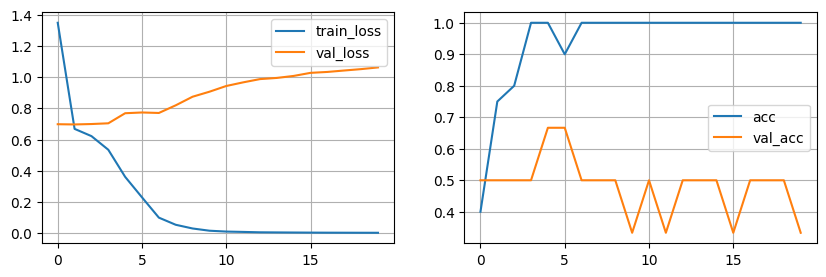

In [35]:
plot_learning_curves(history1)

The data is inadequate. What next - we can try some data augmentation and generate some more training images

In [36]:
!pip install albumentations

In [37]:
import albumentations as A

transform = A.Compose([
    A.ShiftScaleRotate(p=0.1),
    A.Blur(blur_limit=3),
    A.RandomRotate90(),
    A.HorizontalFlip(p=0.5),
    A.RandomBrightnessContrast(p=0.2)
])

In [38]:
len(os.listdir(os.path.join(train_dir, 'pen')))

10

In [39]:
from PIL import Image

## image augmentation function
def augment_image_data(target_directory, target_class, n_images=100):

    # target path
    dirpath = os.path.join(target_directory, target_class)
    total_orig_images = len(os.listdir(dirpath))

    #count to assign to img name
    count = total_orig_images

    # define iterations to generate n_images
    n_iters =int(n_images/total_orig_images)

    # loop for n_iterations
    for _ in range(n_iters):

        # loop over only on original images
        for item in os.listdir(dirpath)[:total_orig_images]:
            # reading the image
            img_file = os.path.join(dirpath, item)
            img_arr = mpimg.imread(img_file)

            # transform image
            img_arr_transformed = transform(image=img_arr)['image']
            img_transformed = Image.fromarray(img_arr_transformed)

            # save to folder
            save_img_path = os.path.join(dirpath, f"{target_class}_aug_{count}.jpg")
            img_transformed.save(save_img_path)

            count+=1


In [40]:
# data augmentation for pen images
augment_image_data(train_dir, 'pen', n_images=100)

In [41]:
# data augmentation for pencil images
augment_image_data(train_dir, 'pencil', n_images=100)

In [42]:
len(os.listdir(os.path.join(train_dir, 'pen'))), len(os.listdir(os.path.join(train_dir, 'pencil')))

(110, 110)

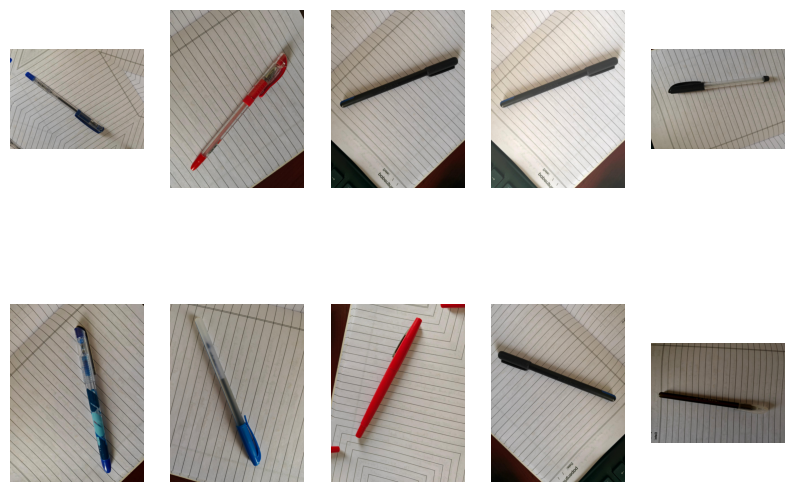

In [43]:
# lets view some images
n_img = 10
nrows = 2
ncols = 5
target_class='pen'

plt.figure(figsize=(10, 7))
for i in range(n_img):
    path = os.path.join(train_dir, target_class)
    random_img = random.choice(os.listdir(path))
    img_arr = mpimg.imread(os.path.join(path, random_img))
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(img_arr)
    plt.axis(False)

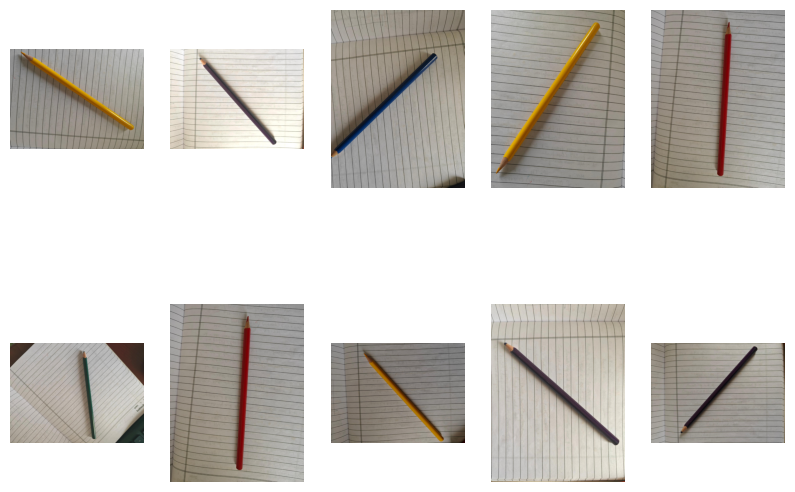

In [44]:
# lets view some images from pencil class
n_img = 10
nrows = 2
ncols = 5
target_class='pencil'

plt.figure(figsize=(10, 7))
for i in range(n_img):
    path = os.path.join(train_dir, target_class)
    random_img = random.choice(os.listdir(path))
    img_arr = mpimg.imread(os.path.join(path, random_img))
    plt.subplot(nrows, ncols, i+1)
    plt.imshow(img_arr)
    plt.axis(False)

Let's prepare train and test generators

In [45]:
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

train_generator = train_datagen.flow_from_directory(train_dir,
                                                    class_mode='binary',
                                                    batch_size=8,
                                                    target_size=(224,224),
                                                    shuffle=True)
test_generator = train_datagen.flow_from_directory(test_dir,
                                                    class_mode='binary',
                                                    batch_size=8,
                                                    target_size=(224,224))

Found 220 images belonging to 2 classes.
Found 6 images belonging to 2 classes.


In [46]:
# clone model 1
model2 = tf.keras.models.clone_model(model1)

# model2 summary
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 111, 111, 10)     0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 54, 54, 10)       0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 1)                

In [47]:
# compile model
model2.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
               metrics=['accuracy'])

In [48]:
history2 = model2.fit(train_generator,
           epochs=10,
           validation_data=test_generator)

Epoch 1/10
28/28 [==============================] - 18s 601ms/step - loss: 0.6980 - accuracy: 0.5318 - val_loss: 0.7396 - val_accuracy: 0.5000
Epoch 2/10
28/28 [==============================] - 14s 494ms/step - loss: 0.6816 - accuracy: 0.5409 - val_loss: 0.7053 - val_accuracy: 0.5000
Epoch 3/10
28/28 [==============================] - 15s 536ms/step - loss: 0.6692 - accuracy: 0.5455 - val_loss: 0.6884 - val_accuracy: 0.3333
Epoch 4/10
28/28 [==============================] - 15s 516ms/step - loss: 0.6339 - accuracy: 0.7273 - val_loss: 0.6812 - val_accuracy: 0.5000
Epoch 5/10
28/28 [==============================] - 16s 579ms/step - loss: 0.5994 - accuracy: 0.7591 - val_loss: 0.6748 - val_accuracy: 0.6667
Epoch 6/10
28/28 [==============================] - 15s 540ms/step - loss: 0.5549 - accuracy: 0.9273 - val_loss: 0.6541 - val_accuracy: 0.6667
Epoch 7/10
28/28 [==============================] - 15s 520ms/step - loss: 0.5166 - accuracy: 0.8682 - val_loss: 0.6276 - val_accuracy: 0.6667

In [49]:
# evaluate model
model2.evaluate(test_generator)

1/1 [==============================] - 1s 1s/step - loss: 0.5738 - accuracy: 0.8333


[0.5738068222999573, 0.8333333134651184]

In [54]:
# saving model
model2.save('model.h5')

In [53]:
#saving augemented data to drive
!cp -r /content/pen_pencil_dataset-main /content/drive/MyDrive

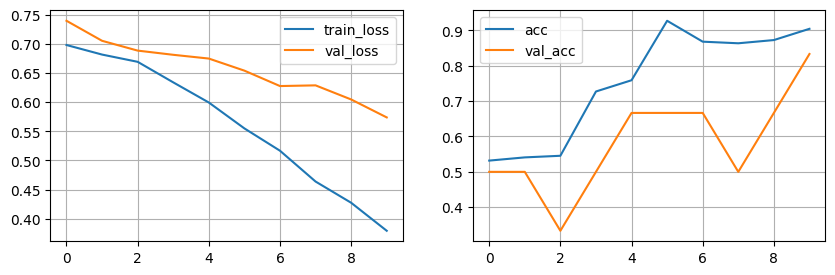

In [50]:
plot_learning_curves(history2)

Data Augmentation did seem to help.
- We observe a downward trend for val_loss and upward trend for val_accuracy.
- Notice the accuracy curve for validation is not smooth and is jaggered one. The performance is actually not stable,although we get a evaluation accuracy of 83%
- we need to evaluate on unseen data to know is actual merit :-)


In [51]:
## Good Bye
print(f"John 3:16 - 'For God so loved the world that He gave His one and only Son, that whoever believes in Him shall not perish but have eternal life.'")
print("Thank You Lord!!!")

John 3:16 - 'For God so loved the world that He gave His one and only Son, that whoever believes in Him shall not perish but have eternal life.'
Thank You Lord!!!
